# Clustering Consulting Project 

A large technology firm needs your help, they've been hacked! Luckily their forensic engineers have grabbed valuable data about the hacks, including information like session time,locations, wpm typing speed, etc. The forensic engineer relates to you what she has been able to figure out so far, she has been able to grab meta data of each session that the hackers used to connect to their servers. These are the features of the data:

* 'Session_Connection_Time': How long the session lasted in minutes
* 'Bytes Transferred': Number of MB transferred during session
* 'Kali_Trace_Used': Indicates if the hacker was using Kali Linux
* 'Servers_Corrupted': Number of server corrupted during the attack
* 'Pages_Corrupted': Number of pages illegally accessed
* 'Location': Location attack came from (Probably useless because the hackers used VPNs)
* 'WPM_Typing_Speed': Their estimated typing speed based on session logs.


The technology firm has 3 potential hackers that perpetrated the attack. Their certain of the first two hackers but they aren't very sure if the third hacker was involved or not. They have requested your help! Can you help figure out whether or not the third suspect had anything to do with the attacks, or was it just two hackers? It's probably not possible to know for sure, but maybe what you've just learned about Clustering can help!

**One last key fact, the forensic engineer knows that the hackers trade off attacks. Meaning they should each have roughly the same amount of attacks. For example if there were 100 total attacks, then in a 2 hacker situation each should have about 50 hacks, in a three hacker situation each would have about 33 hacks. The engineer believes this is the key element to solving this, but doesn't know how to distinguish this unlabeled data into groups of hackers.**

In [167]:
#Install Java JDK of version greater than 8
#Get the spark zip file from apache organiztion 
#Unzipping the file after getting it
#From that Install findspark 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [168]:
#Creating an environment for Java and spark to work with it
import os
import sys
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [169]:
#Initalizing the findspark 
import findspark
findspark.init()

#Creating an entry point for spark using the spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [170]:
!pip install chart_studio
#importing all the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio
import plotly
chart_studio.tools.set_credentials_file(username='soorya0809',api_key='AYmhvGClzfoSzyj5pC0w')
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objects as go
import warnings
### Initialize settings 
sns.set_style('whitegrid')
sns.set(color_codes=True)
warnings.filterwarnings('ignore')
pyoff.init_notebook_mode(connected=True)
get_ipython().magic('matplotlib inline')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
#loading the data file
sdf = spark.read.format("csv")\
      .option("header","true")\
      .option("inferSchema","true")\
      .load("/content/drive/MyDrive/Datasets/spark_datasets/hack_data.csv")

In [173]:
# to view top five rows of dataframe
sdf.show(5)

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|            Location|WPM_Typing_Speed|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
|                    8.0|           391.09|              1|             2.96|            7.0|            Slovenia|           72.37|
|                   20.0|           720.99|              0|             3.04|            9.0|British Virgin Is...|           69.08|
|                   31.0|           356.32|              1|             3.71|            8.0|             Tokelau|           70.58|
|                    2.0|           228.08|              1|             2.48|            8.0|             Bolivia|            70.8|
|                   20.0|            408.5|              0|             3.57

In [174]:
#number of rows
sdf.count()

334

In [175]:
#number of columns
len(sdf.columns)

7

In [176]:
#printing the schema
sdf.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)



In [177]:
# to get the statistics of data
sdf.describe().show()

+-------+-----------------------+------------------+------------------+-----------------+------------------+-----------+------------------+
|summary|Session_Connection_Time| Bytes Transferred|   Kali_Trace_Used|Servers_Corrupted|   Pages_Corrupted|   Location|  WPM_Typing_Speed|
+-------+-----------------------+------------------+------------------+-----------------+------------------+-----------+------------------+
|  count|                    334|               334|               334|              334|               334|        334|               334|
|   mean|     30.008982035928145| 607.2452694610777|0.5119760479041916|5.258502994011977|10.838323353293413|       null|57.342395209580864|
| stddev|     14.088200614636158|286.33593163576757|0.5006065264451406| 2.30190693339697|  3.06352633036022|       null| 13.41106336843464|
|    min|                    1.0|              10.0|                 0|              1.0|               6.0|Afghanistan|              40.0|
|    max|           

# EDA

In [178]:
#create a temp table to run sql quires
sdf.createOrReplaceTempView('sqldf')

In [179]:
sdf.groupBy("Kali_Trace_Used").count().show()

+---------------+-----+
|Kali_Trace_Used|count|
+---------------+-----+
|              1|  171|
|              0|  163|
+---------------+-----+



# Conclusion on Linux system usage
from above analysis we can conclude here that about 50% of time the hackers uses the Linux OS to perform attacks.

In [180]:
# to get unique values in location column
sdf.select('Location').distinct().count()

181

In [181]:
# count of unique location hackers used
spark.sql("select Location,count(*) as co from sqldf group by Location").show()

+--------------------+---+
|            Location| co|
+--------------------+---+
|            Anguilla|  1|
|            Paraguay|  2|
|               Macao|  2|
|Heard Island and ...|  2|
|               Yemen|  1|
|             Tokelau|  2|
|              Sweden|  3|
|French Southern T...|  3|
|            Kiribati|  1|
|              Guyana|  2|
|         Philippines|  3|
|            Malaysia|  2|
|           Singapore|  1|
|United States Vir...|  6|
|              Turkey|  1|
|      Western Sahara|  2|
|              Malawi|  2|
|                Iraq|  3|
|Northern Mariana ...|  3|
|             Germany|  1|
+--------------------+---+
only showing top 20 rows



## Conclusion about the Location feature 
Off total 334 attacks happened there are of 181 unique loaction from where the attack was happned i.e about 54% of times. And there is utmost six attacks from a single location like Zimbabwe, United States, etc..

In [182]:
#getting the histogram for session conection time 
data = [go.Histogram(x=sdf.toPandas()['Session_Connection_Time'],nbinsx=40)]
py.iplot(data)

#conclusion are at last

In [183]:
#getting the histogram for Bytes Transferred  
data = [go.Histogram(x=sdf.toPandas()['Bytes Transferred'],nbinsx=40)]
py.iplot(data)

#conclusion are at last

In [184]:
#getting the histogram for number of corrupted servers 
data = [go.Histogram(x=sdf.toPandas()['Servers_Corrupted'],nbinsx=40)]
py.iplot(data)

#conclusion are at last

In [185]:
sdf_pd = sdf.toPandas()
correlations = sdf_pd.corr()
correlations

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
Session_Connection_Time,1.000000,0.713861,0.034687,0.808394,0.844167,-0.866077
Bytes Transferred,0.713861,1.000000,0.072436,0.739822,0.784081,-0.793344
Kali_Trace_Used,0.034687,0.072436,1.000000,0.033242,0.016931,-0.026560
Servers_Corrupted,0.808394,0.739822,0.033242,1.000000,0.897210,-0.915629
Pages_Corrupted,0.844167,0.784081,0.016931,0.897210,1.000000,-0.968662
WPM_Typing_Speed,-0.866077,-0.793344,-0.026560,-0.915629,-0.968662,1.000000


In [186]:
trace = go.Heatmap(z=[correlations['Session_Connection_Time'],correlations['Bytes Transferred'],
                      correlations['Kali_Trace_Used'],correlations['Servers_Corrupted'],
                      correlations['Pages_Corrupted'],
                      correlations['WPM_Typing_Speed']],
                   x = ['Session_Connection_Time','Bytes Transferred', 'Kali_Trace_Used', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed'],
                   y = ['Session_Connection_Time','Bytes Transferred', 'Kali_Trace_Used', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed'])
data = [trace]
layout = go.Layout(title='HeatMap')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## **Conclusion about the Bytes transfered, servers corrupted during session connection timmings feature**

Here since the PDF of session connection time and bytes transfered is approzimatly same we can conclude that as time session increased more of the useful info/bytes has been transferred during attack. also it is noticable that the number of servers corrupted is increased as session timmings increases.

### **Also these behaviour is noticable from the heatmap for Bytes transfered, servers corrupted during session connection timmings.**

# Data cleaning

In [187]:
#dropping location column as there is high chance that hackers may have used VPN's
sdf = sdf.drop("Location")

In [188]:
# checking for null values
from pyspark.sql.functions import expr, col, column

def null_value_count(df):
  null_columns_counts = []
  for k in df.columns:
    nullRows = df.where(col(k).isNull()).count()
    if(nullRows > 0):
      temp = k,nullRows
      null_columns_counts.append(temp)
  return(null_columns_counts)

null_value_count(sdf)

[]

In [189]:
sdf.show(5)

+-----------------------+-----------------+---------------+-----------------+---------------+----------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|WPM_Typing_Speed|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+
|                    8.0|           391.09|              1|             2.96|            7.0|           72.37|
|                   20.0|           720.99|              0|             3.04|            9.0|           69.08|
|                   31.0|           356.32|              1|             3.71|            8.0|           70.58|
|                    2.0|           228.08|              1|             2.48|            8.0|            70.8|
|                   20.0|            408.5|              0|             3.57|            8.0|           71.28|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+
o

# Model Building

In [190]:
# converting the data into vector using vector assembler, that converts a set of features into a single vector column.
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

assemble = VectorAssembler(inputCols= sdf.columns, outputCol='features')
assembled_data = assemble.transform(sdf)
assembled_data.show(5)

+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|WPM_Typing_Speed|            features|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+
|                    8.0|           391.09|              1|             2.96|            7.0|           72.37|[8.0,391.09,1.0,2...|
|                   20.0|           720.99|              0|             3.04|            9.0|           69.08|[20.0,720.99,0.0,...|
|                   31.0|           356.32|              1|             3.71|            8.0|           70.58|[31.0,356.32,1.0,...|
|                    2.0|           228.08|              1|             2.48|            8.0|            70.8|[2.0,228.08,1.0,2...|
|                   20.0|            408.5|              0|             3.57

In [191]:
# scaling the data since kmeans uses the distance measure(Euclidean distance) 
from pyspark.ml.feature import StandardScaler

scale = StandardScaler(inputCol='features', outputCol='standardized')
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)
data_scale_output.show(2)

+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|WPM_Typing_Speed|            features|        standardized|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+
|                    8.0|           391.09|              1|             2.96|            7.0|           72.37|[8.0,391.09,1.0,2...|[0.56785108466505...|
|                   20.0|           720.99|              0|             3.04|            9.0|           69.08|[20.0,720.99,0.0,...|[1.41962771166263...|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+
only showing top 2 rows



In [192]:
# importing libraries for model building
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [193]:
# Hyper parameter tunning for optimal k value in kmeans and using the silhouette score
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo = KMeans(featuresCol='standardized', k=i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)    
    output = KMeans_fit.transform(data_scale_output)
    score=evaluator.evaluate(output)    
    silhouette_score.append(score)    
    print("Silhouette Score for ",i," is ",score)

Silhouette Score for  2  is  0.8176460094012482
Silhouette Score for  3  is  0.755239186655932
Silhouette Score for  4  is  0.7195901966635138
Silhouette Score for  5  is  0.6336971919009308
Silhouette Score for  6  is  0.5704407152825404
Silhouette Score for  7  is  0.5702368109553203
Silhouette Score for  8  is  0.5235562506999034
Silhouette Score for  9  is  0.4511926859808334


Text(0, 0.5, 'silhouette score')

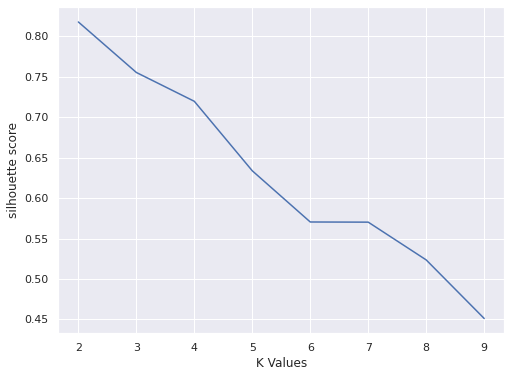

In [194]:
#Visualizing the silhouette scores in a plot and we can see the highest value is when k =2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('K Values')
ax.set_ylabel('silhouette score')

In [195]:
# clustering or groupung with optimal k value i.e... k=2
KMeans_algo = KMeans(featuresCol='standardized', k=2)
KMeans_fit = KMeans_algo.fit(data_scale_output)    
output = KMeans_fit.transform(data_scale_output)
score=evaluator.evaluate(output)
output.show(5)

+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+----------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|WPM_Typing_Speed|            features|        standardized|prediction|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+----------+
|                    8.0|           391.09|              1|             2.96|            7.0|           72.37|[8.0,391.09,1.0,2...|[0.56785108466505...|         0|
|                   20.0|           720.99|              0|             3.04|            9.0|           69.08|[20.0,720.99,0.0,...|[1.41962771166263...|         0|
|                   31.0|           356.32|              1|             3.71|            8.0|           70.58|[31.0,356.32,1.0,...|[2.20042295307707...|         0|
|               

In [196]:
# numbers of records of both clusters
output.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  167|
|         0|  167|
+----------+-----+



### **Solution**: 
#### Perform clustering on this data if we can make only two possible clusters then its confirmed that 2 hackers has involved else we can conclude 3 of the hackers were in the activity.
# **Conclusion** :
### Since the optimal number of clusters formed here are **two**, we can conclude that **only two hackers were involved in this hack. And we can also verify that both hackers were involved in 167 activity each.**